MLP using matrix for weights and bias

Epoch 0, Loss: 0.24999071920420401
Epoch 100, Loss: 0.2339632523435004
Epoch 200, Loss: 0.2010427914541253
Epoch 300, Loss: 0.1542501597997311
Epoch 400, Loss: 0.09683926944223806
Epoch 500, Loss: 0.050526101129729446
Epoch 600, Loss: 0.02511583869477782
Epoch 700, Loss: 0.013212431795661823
Epoch 800, Loss: 0.007576345743413817
Epoch 900, Loss: 0.004708898450643894
Epoch 1000, Loss: 0.003128525779090333
Epoch 1100, Loss: 0.0021927988884911484


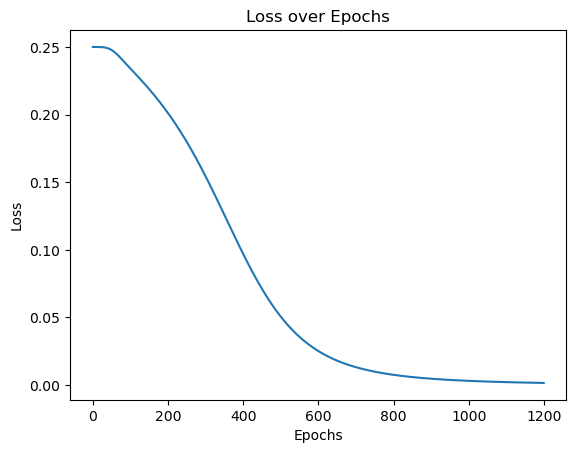

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data: X contains features, Y contains labels
X = np.array([[1, 2, 3, 4], [6, 7, 8, 9], [4, 3, 2, 1], [9, 8, 7, 6]]).T
Y = np.array([[0, 1, 0, 1]])

# Initializing weights and biases
def initialize_parameters(layer_dimensions):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dimensions)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dimensions[l], layer_dimensions[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dimensions[l], 1))
    return parameters

# Sigmoid activation function
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

# Derivative of sigmoid function
def sigmoid_derivative(A):
    return A * (1 - A)

# Forward propagation
def linear_forward(A_prev, W, b):
    Z = np.dot(W, A_prev) + b
    A = sigmoid(Z)
    return A, Z

def L_layer_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2  # number of layers in the neural network

    for l in range(1, L+1):
        A_prev = A
        A, Z = linear_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)])
        caches.append((A_prev, parameters['W' + str(l)], parameters['b' + str(l)], Z))

    return A, caches

# Backward propagation
def linear_backward(dA, cache):
    A_prev, W, b, Z = cache
    m = A_prev.shape[1]

    dZ = dA * sigmoid_derivative(sigmoid(Z))
    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)

    return dA_prev, dW, db

def L_layer_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)

    dAL = -(Y / AL) + (1 - Y) / (1 - AL)

    current_cache = caches[-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_backward(dAL, current_cache)

    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_backward(grads["dA" + str(l+1)], current_cache)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l+1)] = dW_temp
        grads["db" + str(l+1)] = db_temp

    return grads

# Update parameters
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2

    for l in range(1, L + 1):
        parameters["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] -= learning_rate * grads["db" + str(l)]

    return parameters

# Training the MLP
def train(X, Y, layer_dims, learning_rate=0.01, epochs=1000):
    parameters = initialize_parameters(layer_dims)
    loss_history = []

    for i in range(epochs):
        AL, caches = L_layer_forward(X, parameters)
        loss = np.mean((Y - AL)**2)
        loss_history.append(loss)

        grads = L_layer_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)

        if i % 100 == 0:
            print(f'Epoch {i}, Loss: {loss}')

    return parameters, loss_history

# Visualizing the loss
def plot_loss(loss_history):
    plt.plot(loss_history)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.show()
    
# Defining the layer dimensions
layer_dims = [4, 2, 1]

parameters, loss_history = train(X, Y, layer_dims, learning_rate=0.1, epochs=1200)

plot_loss(loss_history)
